# Importação das Bibliotecas que serão utilizadas no Modelo

In [ ]:
!pip install --upgrade tensorflow-addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.3.1 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import gdown
import plotly.express as px
import plotly.graph_objects as go
from tensorflow.keras import backend as K

## Download dos arquivos contendo os datasets de consumo desde 2019 a 2024
  - Aqui retiramos a base de 2020, por conta da pandemia do Coronavírus. Foi uma escolha do grupo devido à possibilidade de discrepância nas leituras

In [ ]:
arquivo_destino_base = "dataset_{}.csv"

ids = {
    "consumo_2024": "1-iXT7eaJWQokHf9cyfrB8N5wvkdhgjJW",
    "consumo_2023": "1-WfvkRwaRr85B_Joxcm9xVdpyg5NBAmp",
    "consumo_2022": "1-Uu4Tf4lufJVFeJnYKc5w7OeW66pe1eC",
    "consumo_2021": "1-2PsTLzG4dcY4wM0p7vFfabUuLv950gC",
    "consumo_2020": "1-1pOoa0eJlNJ94BMi7p4PTx5KUS96mhX",
    "consumo_2019": "1-2PsTLzG4dcY4wM0p7vFfabUuLv950gC",
    "CONSUMO_GERAL": "1-IOqfwmh_tTIDHeOer8J-HkGFtwuX67g",
}


dataframes = {}


for key, file_id in ids.items():
    url = f"https://drive.google.com/uc?id={file_id}"
    arquivo_destino = arquivo_destino_base.format(key)

    gdown.download(url, arquivo_destino, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1-iXT7eaJWQokHf9cyfrB8N5wvkdhgjJW
From (redirected): https://drive.google.com/uc?id=1-iXT7eaJWQokHf9cyfrB8N5wvkdhgjJW&confirm=t&uuid=69886cc1-e801-43cd-80fa-08b10f207ce1
To: /content/dataset_consumo_2024.csv
100%|██████████| 668M/668M [00:04<00:00, 138MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1-WfvkRwaRr85B_Joxcm9xVdpyg5NBAmp
From (redirected): https://drive.google.com/uc?id=1-WfvkRwaRr85B_Joxcm9xVdpyg5NBAmp&confirm=t&uuid=50d444ac-4fac-472d-83dd-8584f9e93c0b
To: /content/dataset_consumo_2023.csv
100%|██████████| 1.09G/1.09G [00:04<00:00, 260MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1-Uu4Tf4lufJVFeJnYKc5w7OeW66pe1eC
From (redirected): https://drive.google.com/uc?id=1-Uu4Tf4lufJVFeJnYKc5w7OeW66pe1eC&confirm=t&uuid=48a15193-cb8f-440a-909c-da42536a5c4c
To: /content/dataset_consumo_2022.csv
100%|██████████| 1.07G/1.07G [00:14<00:00, 73.1MB/s]
Downloading...
From (original): 

In [ ]:
arquivos_csv = [
    "./dataset_consumo_2024.csv",
    "./dataset_consumo_2023.csv",
    "./dataset_consumo_2022.csv",
    "./dataset_consumo_2021.csv",
    "./dataset_consumo_2019.csv",
]

ALL_COLUMNS_CONSUMO_GERAL = pd.concat([pd.read_csv(arquivo, delimiter=";") for arquivo in arquivos_csv], axis=0)

<ipython-input-4-3dfbd926fda9>:9: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  ALL_COLUMNS_CONSUMO_GERAL = pd.concat([pd.read_csv(arquivo, delimiter=";") for arquivo in arquivos_csv], axis=0)
<ipython-input-4-3dfbd926fda9>:9: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  ALL_COLUMNS_CONSUMO_GERAL = pd.concat([pd.read_csv(arquivo, delimiter=";") for arquivo in arquivos_csv], axis=0)
<ipython-input-4-3dfbd926fda9>:9: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  ALL_COLUMNS_CONSUMO_GERAL = pd.concat([pd.read_csv(arquivo, delimiter=";") for arquivo in arquivos_csv], axis=0)
<ipython-input-4-3dfbd926fda9>:9: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  ALL_COLUMNS_CONSUMO_GERAL = pd.concat([pd.read_csv(arquivo, delimiter=";") for arquivo in arquivos_csv], axis=0)


In [ ]:
consumo_geral = pd.read_csv('/content/dataset_CONSUMO_GERAL.csv')

## Download do dataset com o Target das Fraudes

In [ ]:
file_id_fraudes = "1-MbIlChqQapcxFkoJgpbQIsN9FBLfbX1"
url_fraudes = f"https://drive.google.com/uc?id={file_id_fraudes}"

gdown.download(url_fraudes, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1-MbIlChqQapcxFkoJgpbQIsN9FBLfbX1
To: /content/fraudes.csv
100%|██████████| 55.0M/55.0M [00:00<00:00, 179MB/s]


'fraudes.csv'

In [ ]:
fraudes = pd.read_csv('/content/fraudes.csv')

### A tabela "ALL_COLUMNS_CONSUMO_GERAL" possui todas as tabelas de consumo e a partir disso decidimos considerar algumas colunas categóricas que podem ajudar a melhorar o desempenho do nosso modelo

In [ ]:
ALL_COLUMNS_CONSUMO_GERAL

,Unnamed: 0,EMP_CODIGO,REFERENCIA,COD_GRUPO,COD_SETOR_COMERCIAL,NUM_QUADRA,COD_ROTA_LEITURA,MATRICULA,SEQ_RESPONSAVEL,ECO_RESIDENCIAL,...,DSC_SIMULTANEA,VOLUME_ESTIMADO,VOLUME_ESTIMADO_ACUM,FATURADO_MEDIA,COD_LEITURA_INT,STA_TROCA,EXCECAO,STA_ACEITA_LEITURA,COD_LATITUDE,COD_LONGITUDE
0,0,2.0,2024-05-01,4.0,17.0,16.0,11.0,17188010.0,581756.0,0.0,...,63-RETIDA - FATURA ELETRONICA,-21.0,0.0,NaN,901.0,N,Normal,S,-20.460904,-54.634308
1,1,2.0,2024-06-01,4.0,87.0,60.0,38.0,17424465.0,188809.0,1.0,...,00-NAO ENTREGUE,0.0,0.0,NaN,900.0,N,Normal,S,-20.520205,-54.602621
2,2,2.0,2024-07-01,14.0,85.0,314.0,9.0,17857770.0,454315.0,1.0,...,00-NAO ENTREGUE,0.0,0.0,NaN,900.0,N,Normal,S,-20.517992,-54.605950
3,3,2.0,2024-03-01,8.0,5.0,112.0,25.0,17702922.0,311133.0,0.0,...,04-FIXADA AO PORTAO,0.0,0.0,NaN,900.0,N,Normal,S,-20.453648,-54.611187
4,4,2.0,2024-01-01,12.0,88.0,284.0,43.0,17719490.0,735648.0,1.0,...,02-CAIXA CORREIO,-9.0,0.0,NaN,901.0,N,Normal,S,-20.516981,-54.592872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4210815,4210815,2.0,2019-11-01,12.0,8.0,271.0,4.0,17108333.0,1049413.0,1.0,...,02-CAIXA CORREIO,10.0,10.0,MEDIA,107.0,N,Normal,N,-20.469254,-54.597804
4210816,4210816,2.0,2019-11-01,9.0,92.0,330.0,47.0,17171758.0,886058.0,1.0,...,04-FIXADA AO PORTAO,10.0,10.0,MEDIA,107.0,N,Normal,N,-20.550235,-54.573375
4210817,4210817,2.0,2019-11-01,11.0,38.0,416.0,20.0,17779236.0,262062.0,1.0,...,02-CAIXA CORREIO,10.0,10.0,MEDIA,104.0,N,Normal,N,-20.438123,-54.666558
4210818,4210818,2.0,2019-04-01,16.0,3.0,76.0,1.0,17338320.0,167787.0,0.0,...,10-ISENTA - NAO IMPRESSA,0.0,0.0,NaN,900.0,N,Normal,S,-20.456004,-54.596311


### Remoção de colunas indesejadas até o momento

In [ ]:
ALL_COLUMNS_CONSUMO_GERAL = ALL_COLUMNS_CONSUMO_GERAL.drop(columns=['Unnamed: 0', 'EMP_CODIGO', 'COD_GRUPO', 'COD_SETOR_COMERCIAL', 'NUM_QUADRA', 'COD_ROTA_LEITURA', 'SEQ_RESPONSAVEL', 'ECO_RESIDENCIAL', 'ECO_COMERCIAL', 'ECO_INDUSTRIAL', 'ECO_PUBLICA', 'ECO_OUTRAS','LTR_ATUAL', 'LTR_COLETADA', 'DAT_LEITURA', 'DIAS_LEITURA', 'COD_LEITURA_INF_1', 'COD_LEITURA_INF_2', 'COD_LEITURA_INF_3', 'HORA_LEITURA', 'DSC_SIMULTANEA', 'COD_LEITURA_INT','EXCECAO'])

In [ ]:
ALL_COLUMNS_CONSUMO_GERAL.columns

Index(['REFERENCIA', 'MATRICULA', 'CONS_MEDIDO', 'TIPO_LIGACAO', 'CATEGORIA',
       'SUB_CATEGORIA', 'DSC_OCORRENCIA', 'VOLUME_ESTIMADO',
       'VOLUME_ESTIMADO_ACUM', 'FATURADO_MEDIA', 'STA_TROCA',
       'STA_ACEITA_LEITURA', 'COD_LATITUDE', 'COD_LONGITUDE'],
      dtype='object')

### Nessa seção queriamos validar a tabela de "VOLUME_ESTIMADO_ACUM" para ver se ela poderia agregar dentro do nosso modelo

In [ ]:
ALL_COLUMNS_CONSUMO_GERAL[['VOLUME_ESTIMADO_ACUM']].nunique()

,0
VOLUME_ESTIMADO_ACUM,852


In [ ]:
ALL_COLUMNS_CONSUMO_GERAL[ALL_COLUMNS_CONSUMO_GERAL['VOLUME_ESTIMADO'] != 0]

,REFERENCIA,MATRICULA,CONS_MEDIDO,TIPO_LIGACAO,CATEGORIA,SUB_CATEGORIA,DSC_OCORRENCIA,VOLUME_ESTIMADO,VOLUME_ESTIMADO_ACUM,FATURADO_MEDIA,STA_TROCA,STA_ACEITA_LEITURA,COD_LATITUDE,COD_LONGITUDE
0,2024-05-01,17188010.0,43.0,Hidrometrado,COMERCIAL,COMERCIAL,NORMAL,-21.0,0.0,NaN,N,S,-20.460904,-54.634308
4,2024-01-01,17719490.0,20.0,Hidrometrado,RESIDENCIAL,RESIDENCIAL,NORMAL,-9.0,0.0,NaN,N,S,-20.516981,-54.592872
6,2024-05-01,17839667.0,11.0,Hidrometrado,COMERCIAL,COMERCIAL,NORMAL,-6.0,0.0,NaN,N,S,-20.457056,-54.605360
10,2024-01-01,17369705.0,21.0,Hidrometrado,RESIDENCIAL,RESIDENCIAL,NORMAL,-8.0,0.0,NaN,N,S,-20.485598,-54.595796
12,2024-05-01,17270425.0,47.0,Hidrometrado,RESIDENCIAL,RESIDENCIAL,NORMAL,-23.0,0.0,NaN,N,S,-20.435660,-54.589481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4210813,2019-11-01,17274918.0,0.0,Hidrometrado,RESIDENCIAL,RESIDENCIAL,MEDIDOR COM MOSTRADOR SUJO,10.0,10.0,MEDIA,N,N,-20.517018,-54.600064
4210814,2019-11-01,17256088.0,0.0,Hidrometrado,RESIDENCIAL,RESIDENCIAL,MEDIDOR DE DIFÍCIL ACESSO,10.0,10.0,MEDIA,N,N,-20.416534,-54.568428
4210815,2019-11-01,17108333.0,0.0,Hidrometrado,RESIDENCIAL,RESIDENCIAL,MEDIDOR DE DIFÍCIL ACESSO,10.0,10.0,MEDIA,N,N,-20.469254,-54.597804
4210816,2019-11-01,17171758.0,0.0,Hidrometrado,RESIDENCIAL,RESIDENCIAL,MEDIDOR DE DIFÍCIL ACESSO,10.0,10.0,MEDIA,N,N,-20.550235,-54.573375


#### O insight retirado aqui é que talvez a melhor coluna para validação e ser utilizada como featura no modelo é a coluna de Volume Estimado. Ela possui maior consistência nos resultados, do que a coluna de Volume Estimado Acumulado

### Separação de Features relevantes

Após pesquisas e visualizar as colunas disponíveis, percebemos uma coluna que poderia ser interessante para o processo de identificação de fraude. A coluna de "DSC_OCORRENCIA". Ela basicamente corresponde a descrição de como foi o processo de vistoria e coleta do responsável e em cada um dos domicílios (matrícula)

Isso surgiu como uma possibilidade de tentar direcionar o modelo para casos nos quais há uma maior possibilidade de uma fraude, de acordo com a visualização do medidor em cada um desses domicílios.

In [ ]:
ALL_COLUMNS_CONSUMO_GERAL_PREMISSA_VINI = ALL_COLUMNS_CONSUMO_GERAL[ALL_COLUMNS_CONSUMO_GERAL['DSC_OCORRENCIA'].isin([
    'NORMAL',
    'MEDIDOR RETIRADO/FURTADO',
    'LEITURA COLETADA PELO CLIENTE',
    'MEDIDOR NÃO LOCALIZADO',
    'IMÓVEL DESOCUPADO'
])]

ALL_COLUMNS_CONSUMO_GERAL_PREMISSA_VINI

,REFERENCIA,MATRICULA,CONS_MEDIDO,TIPO_LIGACAO,CATEGORIA,SUB_CATEGORIA,DSC_OCORRENCIA,VOLUME_ESTIMADO,VOLUME_ESTIMADO_ACUM,FATURADO_MEDIA,STA_TROCA,STA_ACEITA_LEITURA,COD_LATITUDE,COD_LONGITUDE
0,2024-05-01,17188010.0,43.0,Hidrometrado,COMERCIAL,COMERCIAL,NORMAL,-21.0,0.0,NaN,N,S,-20.460904,-54.634308
1,2024-06-01,17424465.0,0.0,Consumo Fixo,RESIDENCIAL,RESIDENCIAL,NORMAL,0.0,0.0,NaN,N,S,-20.520205,-54.602621
2,2024-07-01,17857770.0,0.0,Consumo Fixo,RESIDENCIAL,RESIDENCIAL,NORMAL,0.0,0.0,NaN,N,S,-20.517992,-54.605950
3,2024-03-01,17702922.0,0.0,Consumo Fixo,COMERCIAL,COMERCIAL,NORMAL,0.0,0.0,NaN,N,S,-20.453648,-54.611187
4,2024-01-01,17719490.0,20.0,Hidrometrado,RESIDENCIAL,RESIDENCIAL,NORMAL,-9.0,0.0,NaN,N,S,-20.516981,-54.592872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4210780,2019-04-01,17839769.0,0.0,Hidrometrado,COMERCIAL,COMERCIAL,NORMAL,0.0,0.0,NaN,N,S,-20.432348,-54.591438
4210781,2019-04-01,17117827.0,0.0,Hidrometrado,RESIDENCIAL,RESIDENCIAL,NORMAL,0.0,0.0,NaN,N,S,-20.500598,-54.642763
4210801,2019-11-01,17086687.0,0.0,Hidrometrado,RESIDENCIAL,RESIDENCIAL,MEDIDOR NÃO LOCALIZADO,18.0,37.0,MEDIA,N,N,-20.468684,-54.625729
4210818,2019-04-01,17338320.0,0.0,Consumo Fixo,COMERCIAL,COMERCIAL,NORMAL,0.0,0.0,NaN,N,S,-20.456004,-54.596311


## Tratando Dataframe com mais colunas targets adicionadas

#### Seperação do Dataframe apenas para a visualização das matriculas com Categoria Residencial

In [ ]:
dataframe_pj_premissa = ALL_COLUMNS_CONSUMO_GERAL_PREMISSA_VINI[ALL_COLUMNS_CONSUMO_GERAL_PREMISSA_VINI["CATEGORIA"].isin(["COMERCIAL", "PUBLICA", "INDUSTRIAL"])]
dataframe_pj_premissa

,REFERENCIA,MATRICULA,CONS_MEDIDO,TIPO_LIGACAO,CATEGORIA,SUB_CATEGORIA,DSC_OCORRENCIA,VOLUME_ESTIMADO,VOLUME_ESTIMADO_ACUM,FATURADO_MEDIA,STA_TROCA,STA_ACEITA_LEITURA,COD_LATITUDE,COD_LONGITUDE
0,2024-05-01,17188010.0,43.0,Hidrometrado,COMERCIAL,COMERCIAL,NORMAL,-21.0,0.0,NaN,N,S,-20.460904,-54.634308
3,2024-03-01,17702922.0,0.0,Consumo Fixo,COMERCIAL,COMERCIAL,NORMAL,0.0,0.0,NaN,N,S,-20.453648,-54.611187
6,2024-05-01,17839667.0,11.0,Hidrometrado,COMERCIAL,COMERCIAL,NORMAL,-6.0,0.0,NaN,N,S,-20.457056,-54.605360
9,2024-03-01,17106269.0,0.0,Consumo Fixo,COMERCIAL,COMERCIAL,NORMAL,0.0,0.0,NaN,N,S,-20.475057,-54.607668
14,2024-07-01,17269218.0,0.0,Consumo Fixo,COMERCIAL,COMERCIAL,NORMAL,0.0,0.0,NaN,N,S,-20.421107,-54.577934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4210778,2019-04-01,17839086.0,0.0,Hidrometrado,COMERCIAL,COMERCIAL,NORMAL,0.0,0.0,NaN,N,S,-20.454158,-54.615851
4210779,2019-04-01,17838898.0,0.0,Hidrometrado,COMERCIAL,COMERCIAL,NORMAL,0.0,0.0,NaN,N,S,-20.482753,-54.640831
4210780,2019-04-01,17839769.0,0.0,Hidrometrado,COMERCIAL,COMERCIAL,NORMAL,0.0,0.0,NaN,N,S,-20.432348,-54.591438
4210818,2019-04-01,17338320.0,0.0,Consumo Fixo,COMERCIAL,COMERCIAL,NORMAL,0.0,0.0,NaN,N,S,-20.456004,-54.596311


### Processo de One Hot Encoding para as Colunas, as quais serão as features para o nosso modelo

In [ ]:
# Fazendo o one hot encoding 

dataframe_pj_premissa = pd.get_dummies(dataframe_pj_premissa, columns=['TIPO_LIGACAO', 'DSC_OCORRENCIA', 'STA_TROCA', 'STA_ACEITA_LEITURA'], dtype='int')

In [ ]:
dataframe_pj_premissa

,REFERENCIA,MATRICULA,CONS_MEDIDO,CATEGORIA,SUB_CATEGORIA,VOLUME_ESTIMADO,VOLUME_ESTIMADO_ACUM,FATURADO_MEDIA,COD_LATITUDE,COD_LONGITUDE,...,TIPO_LIGACAO_Hidrometrado,DSC_OCORRENCIA_IMÓVEL DESOCUPADO,DSC_OCORRENCIA_LEITURA COLETADA PELO CLIENTE,DSC_OCORRENCIA_MEDIDOR NÃO LOCALIZADO,DSC_OCORRENCIA_MEDIDOR RETIRADO/FURTADO,DSC_OCORRENCIA_NORMAL,STA_TROCA_N,STA_TROCA_S,STA_ACEITA_LEITURA_N,STA_ACEITA_LEITURA_S
0,2024-05-01,17188010.0,43.0,COMERCIAL,COMERCIAL,-21.0,0.0,NaN,-20.460904,-54.634308,...,1,0,0,0,0,1,1,0,0,1
3,2024-03-01,17702922.0,0.0,COMERCIAL,COMERCIAL,0.0,0.0,NaN,-20.453648,-54.611187,...,0,0,0,0,0,1,1,0,0,1
6,2024-05-01,17839667.0,11.0,COMERCIAL,COMERCIAL,-6.0,0.0,NaN,-20.457056,-54.605360,...,1,0,0,0,0,1,1,0,0,1
9,2024-03-01,17106269.0,0.0,COMERCIAL,COMERCIAL,0.0,0.0,NaN,-20.475057,-54.607668,...,0,0,0,0,0,1,1,0,0,1
14,2024-07-01,17269218.0,0.0,COMERCIAL,COMERCIAL,0.0,0.0,NaN,-20.421107,-54.577934,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4210778,2019-04-01,17839086.0,0.0,COMERCIAL,COMERCIAL,0.0,0.0,NaN,-20.454158,-54.615851,...,1,0,0,0,0,1,1,0,0,1
4210779,2019-04-01,17838898.0,0.0,COMERCIAL,COMERCIAL,0.0,0.0,NaN,-20.482753,-54.640831,...,1,0,0,0,0,1,1,0,0,1
4210780,2019-04-01,17839769.0,0.0,COMERCIAL,COMERCIAL,0.0,0.0,NaN,-20.432348,-54.591438,...,1,0,0,0,0,1,1,0,0,1
4210818,2019-04-01,17338320.0,0.0,COMERCIAL,COMERCIAL,0.0,0.0,NaN,-20.456004,-54.596311,...,0,0,0,0,0,1,1,0,0,1


### Tratando os valores da tabela de fraude

In [ ]:
# analizando as colunas

fraudes.columns

Index(['TIPOOS', 'ANOOS', 'IDOSP', 'ANOMES', 'MATRICULA', 'OS', 'SERVICO',
       'DESCRICAO', 'COD_GRUPO', 'SETOR', 'DATACONCLUSAO', 'STATUS', 'ATRASO',
       'DESCRSETOR', 'DESCRSETORSOLICITANTE', 'ID_CONTRATO', 'CD_CONTRATO',
       'CD_SUB_REGIAO', 'CD_REGIAO', 'FL_PRINCIPAL', 'DS_SERVICO_SOLICITADO',
       'FL_EXECUTADO', 'DT_SERVICO', 'DT_FECHAMENTO', 'PARECER_EXECUCAO'],
      dtype='object')

In [ ]:
# removendo os duplicados do dataframe de fraudes
dataframe_fraudes_premissa = fraudes[['MATRICULA', 'DESCRICAO']].drop_duplicates()

# fazendo o one hot encoding do dataframe de fraudes
dataframe_fraudes_premissa = pd.get_dummies(dataframe_fraudes_premissa, columns=['DESCRICAO'], dtype='int')

In [ ]:
# analizando o tipo de dados que temos na tabela de fraudes

dataframe_fraudes_premissa['DESCRICAO_IRREGULARIDADE IDENTIFICADA'].unique()

array([1])

In [ ]:
# Realiza a junção (merge) entre 'dataframe_pj_premissa' e 'dataframe_fraudes_premissa' com base na coluna 'MATRICULA', 
# mantendo todas as linhas de 'dataframe_pj_premissa' e adicionando informações de 'dataframe_fraudes_premissa' quando disponíveis
dataframe_pj_premissa = pd.merge(dataframe_pj_premissa, dataframe_fraudes_premissa, on='MATRICULA', how='left')

In [ ]:
# dataframe_pj_premissa.drop_duplicates(subset="MATRICULA", keep='first')
dataframe_pj_premissa.dropna(subset="REFERENCIA")

,REFERENCIA,MATRICULA,CONS_MEDIDO,CATEGORIA,SUB_CATEGORIA,VOLUME_ESTIMADO,VOLUME_ESTIMADO_ACUM,FATURADO_MEDIA,COD_LATITUDE,COD_LONGITUDE,...,DSC_OCORRENCIA_IMÓVEL DESOCUPADO,DSC_OCORRENCIA_LEITURA COLETADA PELO CLIENTE,DSC_OCORRENCIA_MEDIDOR NÃO LOCALIZADO,DSC_OCORRENCIA_MEDIDOR RETIRADO/FURTADO,DSC_OCORRENCIA_NORMAL,STA_TROCA_N,STA_TROCA_S,STA_ACEITA_LEITURA_N,STA_ACEITA_LEITURA_S,DESCRICAO_IRREGULARIDADE IDENTIFICADA
0,2024-05-01,17188010.0,43.0,COMERCIAL,COMERCIAL,-21.0,0.0,NaN,-20.460904,-54.634308,...,0,0,0,0,1,1,0,0,1,NaN
1,2024-03-01,17702922.0,0.0,COMERCIAL,COMERCIAL,0.0,0.0,NaN,-20.453648,-54.611187,...,0,0,0,0,1,1,0,0,1,NaN
2,2024-05-01,17839667.0,11.0,COMERCIAL,COMERCIAL,-6.0,0.0,NaN,-20.457056,-54.605360,...,0,0,0,0,1,1,0,0,1,NaN
3,2024-03-01,17106269.0,0.0,COMERCIAL,COMERCIAL,0.0,0.0,NaN,-20.475057,-54.607668,...,0,0,0,0,1,1,0,0,1,NaN
4,2024-07-01,17269218.0,0.0,COMERCIAL,COMERCIAL,0.0,0.0,NaN,-20.421107,-54.577934,...,0,0,0,0,1,1,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1742512,2019-04-01,17839086.0,0.0,COMERCIAL,COMERCIAL,0.0,0.0,NaN,-20.454158,-54.615851,...,0,0,0,0,1,1,0,0,1,NaN
1742513,2019-04-01,17838898.0,0.0,COMERCIAL,COMERCIAL,0.0,0.0,NaN,-20.482753,-54.640831,...,0,0,0,0,1,1,0,0,1,1.0
1742514,2019-04-01,17839769.0,0.0,COMERCIAL,COMERCIAL,0.0,0.0,NaN,-20.432348,-54.591438,...,0,0,0,0,1,1,0,0,1,NaN
1742515,2019-04-01,17338320.0,0.0,COMERCIAL,COMERCIAL,0.0,0.0,NaN,-20.456004,-54.596311,...,0,0,0,0,1,1,0,0,1,NaN


### Normalizando com o Robust Scaler

O RobustScaler é uma técnica de normalização usada para transformar dados. Ele é útil especialmente quando os dados contêm outliers, ou seja, valores atípicos que podem distorcer (neste caso o Consumo e o Volume) os resultados de outras técnicas de escalonamento, como StandardScaler ou MinMaxScaler.

O RobustScaler transforma os dados subtraindo a mediana e dividindo pela amplitude interquartil (IQR, Interquartile Range). A mediana é o valor do ponto médio quando os dados são ordenados, e o IQR é a diferença entre o terceiro quartil (75º percentil) e o primeiro quartil (25º percentil).

Esse método é menos sensível a outliers porque, ao contrário da média e do desvio padrão (usados pelo StandardScaler), a mediana e o IQR não são afetados por valores extremos.

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()


# exercendo a normalização
dataframe_pj_premissa[['CONS_MEDIDO']] = scaler.fit_transform(dataframe_pj_premissa[['CONS_MEDIDO']])
dataframe_pj_premissa[['VOLUME_ESTIMADO']] = scaler.fit_transform(dataframe_pj_premissa[['VOLUME_ESTIMADO']])

### Pivotando a tabela de consumo

- Para o index ficar na matrícula e ter uma representação das datas temporais em formato de colunas

In [ ]:
# Cria uma tabela dinâmica (pivot table) a partir de 'dataframe_pj_premissa', usando 'MATRICULA' como índice,
# 'REFERENCIA' como colunas, e somando os valores de 'CONS_MEDIDO' e 'VOLUME_ESTIMADO'
pivoted_df = pd.pivot_table(
    dataframe_pj_premissa,
    index='MATRICULA',
    columns='REFERENCIA',
    values=['CONS_MEDIDO', 'VOLUME_ESTIMADO'],
    aggfunc='sum'
)

# Concatena os nomes das colunas resultantes, unindo os nomes com um underline ('_') e removendo espaços extras
pivoted_df.columns = ['_'.join(col).strip() for col in pivoted_df.columns.values]

# Reseta o índice para que 'MATRICULA' volte a ser uma coluna regular
pivoted_df = pivoted_df.reset_index()

# Exibe as primeiras linhas do DataFrame resultante
pivoted_df.head()

,MATRICULA,CONS_MEDIDO_2019-01-01,CONS_MEDIDO_2019-02-01,CONS_MEDIDO_2019-03-01,CONS_MEDIDO_2019-04-01,CONS_MEDIDO_2019-05-01,CONS_MEDIDO_2019-06-01,CONS_MEDIDO_2019-07-01,CONS_MEDIDO_2019-08-01,CONS_MEDIDO_2019-09-01,...,VOLUME_ESTIMADO_2023-11-01,VOLUME_ESTIMADO_2023-12-01,VOLUME_ESTIMADO_2024-01-01,VOLUME_ESTIMADO_2024-02-01,VOLUME_ESTIMADO_2024-03-01,VOLUME_ESTIMADO_2024-04-01,VOLUME_ESTIMADO_2024-05-01,VOLUME_ESTIMADO_2024-06-01,VOLUME_ESTIMADO_2024-07-01,VOLUME_ESTIMADO_2024-08-01
0,17075331.0,0.428571,0.571429,0.571429,NaN,1.714286,0.714286,0.714286,0.857143,0.857143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17075333.0,-0.571429,-0.571429,-0.571429,-0.571429,-0.571429,-0.571429,-0.571429,-0.571429,-0.571429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,17075335.0,-0.142857,0.000000,-0.142857,-0.142857,-0.142857,-0.428571,-0.285714,0.000000,1.285714,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,17075337.0,-0.285714,-0.285714,-0.285714,0.285714,-0.142857,-0.142857,0.000000,-0.142857,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17075338.0,1.000000,0.571429,1.142857,1.285714,0.714286,1.000000,0.857143,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# analizando resultados

len(pivoted_df)

46508

### Atribuição de cada uma das variáveis categóricas ao dataframe com o consumo e volume históricos

- O código integra dados de tipo de ligação, ocorrências de medidores e identificação de irregularidades ao DataFrame principal, pivoted_df. Após cada junção, os valores nulos são substituídos por zero para garantir a completude dos dados. 

- É importante citar aqui que atribuímos a premissa que a primeira definição de tipo de ligação, descrição e os outros utilizados, serão os que tomaremos como base para inferência dentro do modelo

In [ ]:
# fazendo o tratamento e a junção da coluna de tipo de ligação

tipo_ligacao = dataframe_pj_premissa[['MATRICULA','TIPO_LIGACAO_Consumo Fixo', 'TIPO_LIGACAO_Hidrometrado']].drop_duplicates(subset='MATRICULA', keep='first')
pivoted_df = pivoted_df.merge(tipo_ligacao, on='MATRICULA', how='left').fillna(0)

In [ ]:
# fazendo o tratamento e a junção do tipo de ocorrencia

descricao_ocorrencia = dataframe_pj_premissa[['MATRICULA','DSC_OCORRENCIA_MEDIDOR NÃO LOCALIZADO', 'DSC_OCORRENCIA_MEDIDOR RETIRADO/FURTADO', 'DSC_OCORRENCIA_NORMAL']].drop_duplicates(subset='MATRICULA', keep='first')
pivoted_df = pivoted_df.merge(descricao_ocorrencia, on='MATRICULA', how='left').fillna(0)

In [ ]:
# juntando a tabela de consumo com a de fraude. Preenchendo os valores vazios (as que não estão na tabela de fraude) com zero, representando que eles não cometeram fraude

fraude_ou_não = dataframe_pj_premissa[['MATRICULA','DESCRICAO_IRREGULARIDADE IDENTIFICADA']].drop_duplicates(subset='MATRICULA', keep='first')
pivoted_df = pivoted_df.merge(fraude_ou_não, on='MATRICULA', how='left').fillna(0)

In [ ]:
pivoted_df = pivoted_df.fillna(0)

In [ ]:
pivoted_df

,MATRICULA,CONS_MEDIDO_2019-01-01,CONS_MEDIDO_2019-02-01,CONS_MEDIDO_2019-03-01,CONS_MEDIDO_2019-04-01,CONS_MEDIDO_2019-05-01,CONS_MEDIDO_2019-06-01,CONS_MEDIDO_2019-07-01,CONS_MEDIDO_2019-08-01,CONS_MEDIDO_2019-09-01,...,VOLUME_ESTIMADO_2024-05-01,VOLUME_ESTIMADO_2024-06-01,VOLUME_ESTIMADO_2024-07-01,VOLUME_ESTIMADO_2024-08-01,TIPO_LIGACAO_Consumo Fixo,TIPO_LIGACAO_Hidrometrado,DSC_OCORRENCIA_MEDIDOR NÃO LOCALIZADO,DSC_OCORRENCIA_MEDIDOR RETIRADO/FURTADO,DSC_OCORRENCIA_NORMAL,DESCRICAO_IRREGULARIDADE IDENTIFICADA
0,17075331.0,0.428571,0.571429,0.571429,0.000000,1.714286,0.714286,0.714286,0.857143,0.857143,...,0.0,0.0,0.0,0.0,0,1,0,0,1,0.0
1,17075333.0,-0.571429,-0.571429,-0.571429,-0.571429,-0.571429,-0.571429,-0.571429,-0.571429,-0.571429,...,0.0,0.0,0.0,0.0,1,0,0,0,1,0.0
2,17075335.0,-0.142857,0.000000,-0.142857,-0.142857,-0.142857,-0.428571,-0.285714,0.000000,1.285714,...,0.0,0.0,0.0,0.0,0,1,0,0,1,1.0
3,17075337.0,-0.285714,-0.285714,-0.285714,0.285714,-0.142857,-0.142857,0.000000,-0.142857,0.000000,...,0.0,0.0,0.0,0.0,0,1,0,0,1,0.0
4,17075338.0,1.000000,0.571429,1.142857,1.285714,0.714286,1.000000,0.857143,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0,1,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46503,17997581.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0,1,0,0,1,0.0
46504,17997582.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0,1,0,0,1,0.0
46505,17997584.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0,1,0,0,1,0.0
46506,17997585.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0,1,0,0,1,0.0


## Rodando o modelo

### Divisão de Treino e Teste

In [ ]:
pivoted_df.shape

(46508, 95)

#### Balanceando os dados com Smote (Synthetic Minority Over-sampling Technique)

O smote é uma técnica de "oversampling" usada para balancear datasets com o objetivo de aumentar a quantidade de amostras da classe minoritária gerando novos exemplos sintéticos, em vez de simplesmente replicar os dados existentes. Isso ajuda a melhorar a performance de modelos de machine learning ao treinar com um dataset mais balanceado.

Quando você treina um modelo de machine learning com um dataset desbalanceado (onde uma classe tem muito mais exemplos do que a outra), o modelo tende a favorecer a classe majoritária.

Como resultado, o modelo pode ter um bom desempenho em termos de acurácia geral, mas um desempenho ruim ao identificar a classe minoritária (por exemplo, falhas, fraudes, etc.).

O Smote ajuda a mitigar esse problema ao balancear o dataset, aumentando o número de exemplos da classe minoritária.

In [ ]:
# função para balanciar

def balanciar(df):
  smote = SMOTE(random_state=42)
  X = pivoted_df.drop('DESCRICAO_IRREGULARIDADE IDENTIFICADA', axis=1)
  y = pivoted_df['DESCRICAO_IRREGULARIDADE IDENTIFICADA']
  X_res, y_res = smote.fit_resample(X, y)
  return pd.concat([X_res, y_res], axis=1)

In [ ]:
# analizando a distribuição do label nos dados antes do balanciamento

np.unique(pivoted_df['DESCRICAO_IRREGULARIDADE IDENTIFICADA'].values, return_counts=True)

(array([0., 1.]), array([32461, 14047]))

In [ ]:
# balanciando os dodos

pivoted_df = balanciar(pivoted_df.fillna(0))

In [ ]:
# dividindo label e dados para previsão

y = pivoted_df['DESCRICAO_IRREGULARIDADE IDENTIFICADA'].values
X = pivoted_df.drop(['MATRICULA','DESCRICAO_IRREGULARIDADE IDENTIFICADA'], axis=1).values

In [ ]:
# dividindo dados de treinamento e teste

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=42)

In [65]:
# criando o modelo

import tensorflow.keras as keras
from tensorflow.keras import layers

model = keras.Sequential([
    keras.layers.Input(shape=(x_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [66]:
# visualizando o modelo

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 64)                  │           6,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,721 (88.75 KB)

 Trainable params: 22,721 (88.75 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
# compiando o modelo, adicionando metricas para visualizar e a função de perda

model.compile(loss='binary_crossentropy', metrics=['accuracy', 'precision'])

In [68]:
# Valiando e analizando as dimenções dos dados que irão para o modelo

x_train.shape

(45445, 93)

In [69]:
y_train.shape

(45445,)

In [70]:
x_val.shape

(19477, 93)

In [71]:
y_val.shape

(19477,)

In [ ]:
# adicinando early stoping para diminuir o overfit do modelo e parar e fazer um treinamento mais eficiente

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [72]:
# treinando o modelo

result = model.fit(x_train, y_train, epochs=25, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/25
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5768 - loss: 0.7234 - precision: 0.5812 - val_accuracy: 0.6090 - val_loss: 0.6722 - val_precision: 0.6282
Epoch 2/25
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6145 - loss: 0.6540 - precision: 0.6274 - val_accuracy: 0.5983 - val_loss: 0.6887 - val_precision: 0.6168
Epoch 3/25
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6235 - loss: 0.6489 - precision: 0.6423 - val_accuracy: 0.6239 - val_loss: 0.6486 - val_precision: 0.6683
Epoch 4/25
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6265 - loss: 0.6413 - precision: 0.6543 - val_accuracy: 0.6266 - val_loss: 0.6485 - val_precision: 0.6237
Epoch 5/25
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6386 - loss: 0.6349 - precision: 0.6585 - val_accuracy: 0.6315 - val_loss: 0.6686 - val_precision: 0.6581
Epoch 6/25
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6439 - loss: 0.6482 - precision: 0.6676 - val_accuracy: 0.6281

### Visualizando os resultados do modelo

In [73]:
# visão temporal da performance do modelo

history = result.history
fig = px.line(x=list(range(1, 26)), y=history['loss'], labels={'x': 'Épocas', 'y': 'Perda'}, title='Função de Custo durante o Treinamento')
fig.update_traces(mode='lines+markers')
fig.show()

609/609 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


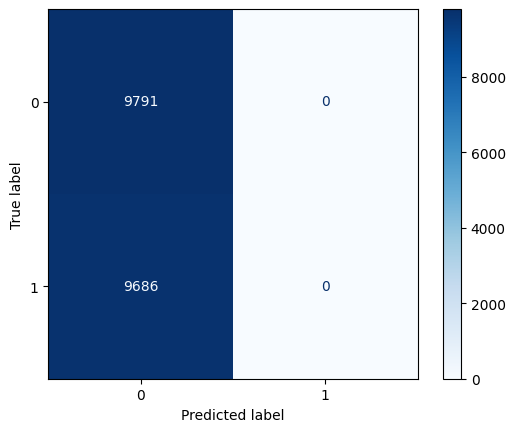

In [75]:
# matriz de confusão para avaliação da distribuição de erros do modelo

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.models import load_model

y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_val, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

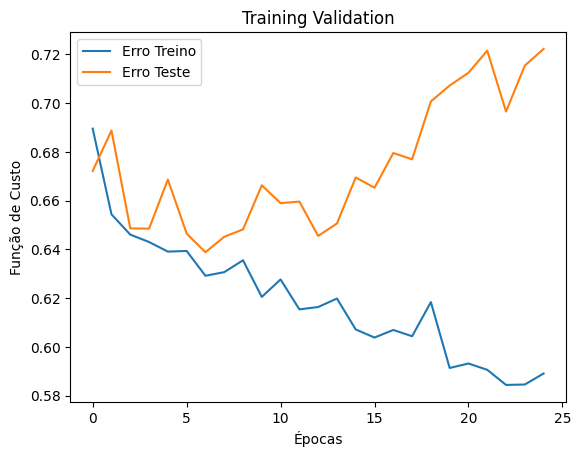

In [76]:
# gráfico da loss durante o treinamento

plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label='val_loss')
plt.legend(['Erro Treino', 'Erro Teste'])
plt.xlabel('Épocas')
plt.ylabel('Função de Custo')
plt.title('Training Validation')
plt.show()

In [77]:
# Análizando a precisão e a perda do modelo

fig = go.Figure()

fig.add_trace(go.Line(x=list(range(1, 26)), y=history['accuracy'], mode='lines+markers', name='Precisão de Treinamento'))

fig.add_trace(go.Line(x=list(range(1, 26)), y=history['val_loss'], mode='lines+markers', name='Perda de Validação'))

fig.update_layout(title='Precisão e Perda durante o Treinamento', xaxis_title='Épocas', yaxis_title='Valor', legend_title='Métrica')
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




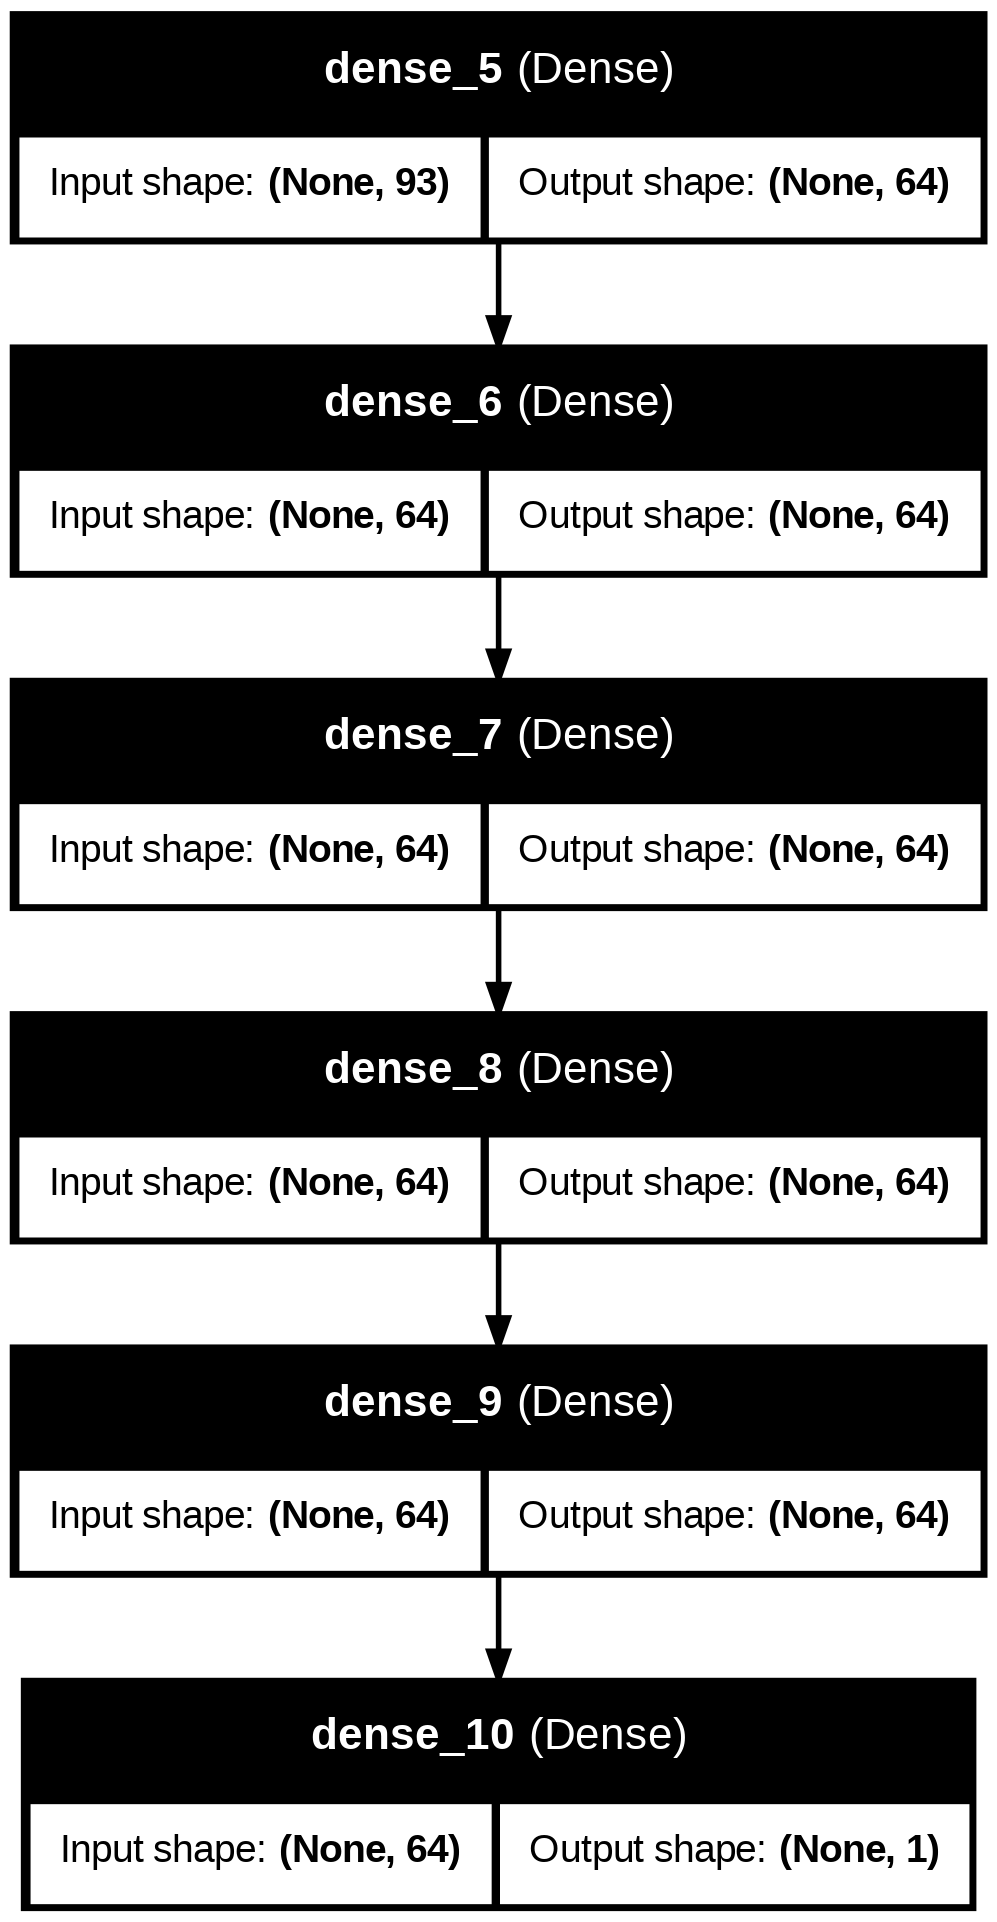

In [78]:
# ploanto a arquitetura do modelo

from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_visualization.png', show_shapes=True, show_layer_names=True)